# 基于 Alphalens 的因子分析


## 1) 因子数据提取
这里选择股票池为沪深300

In [2]:
# 本代码由可视化策略环境自动生成 2023年2月16日 16:38
# 本代码单元只能在可视化模式下编辑。您也可以拷贝代码，粘贴到新建的代码单元或者策略，然后修改。


# Python 代码入口函数，input_1/2/3 对应三个输入端，data_1/2/3 对应三个输出端
def m5_run_bigquant_run(input_1, input_2, input_3):
    '''
        input_1 数据输入
        input_2 空
        input_3 参数输入
    '''
    
    # 参数
    params = input_3.read_pickle()
    
    # 输入
    df = input_1.read_df()
    # 过滤
    df = df[(df.date>=params["start_date"]) & (df.date<=params["end_date"])]
    # 输出
    data_1 = DataSource.write_df(df)
    return Outputs(data_1=data_1, data_2=None, data_3=None)

# 后处理函数，可选。输入是主函数的输出，可以在这里对数据做处理，或者返回更友好的outputs数据格式。此函数输出不会被缓存。
def m5_post_run_bigquant_run(outputs):
    return outputs


m1 = M.input_features.v1(
    features="""# #号开始的表示注释
# 多个特征，每行一个，可以包含基础特征和衍生特征
# return_5
# return_10
# return_20
# avg_amount_0/avg_amount_5
# avg_amount_5/avg_amount_20
# rank_avg_amount_0/rank_avg_amount_5
# rank_avg_amount_5/rank_avg_amount_10
# rank_return_0
# rank_return_5
# rank_return_10
# rank_return_0/rank_return_5
# rank_return_5/rank_return_10
pe_ttm_0
"""
)

m2 = M.instruments.v2(
    start_date='2020-01-01',
    end_date='2022-01-01',
    market='CN_STOCK_A',
    instrument_list='',
    max_count=0
)

m3 = M.general_feature_extractor.v6(
    instruments=m2.data,
    features=m1.data,
    start_date='',
    end_date='',
    before_start_days=120
)

m4 = M.derived_feature_extractor.v2(
    input_data=m3.data,
    features=m1.data,
    date_col='date',
    instrument_col='instrument'
)

m5 = M.cached.v3(
    input_1=m4.data,
    input_3=m2.data,
    run=m5_run_bigquant_run,
    post_run=m5_post_run_bigquant_run,
    input_ports='',
    params='{}',
    output_ports=''
)

m6 = M.advanced_auto_labeler.v2(
    instruments=m2.data,
    label_expr="""# #号开始的表示注释
# 0. 每行一个，顺序执行，从第二个开始，可以使用label字段
# 1. 可用数据字段见 https://bigquant.com/docs/data_history_data.html
#   添加benchmark_前缀，可使用对应的benchmark数据
# 2. 可用操作符和函数见 `表达式引擎 <https://bigquant.com/docs/big_expr.html>`_

# 计算收益：5日收盘价(作为卖出价格)除以明日开盘价(作为买入价格)
shift(close, -5) / shift(open, -1)

# 极值处理：用1%和99%分位的值做clip
clip(label, all_quantile(label, 0.01), all_quantile(label, 0.99))

# 将分数映射到分类，这里使用20个分类
all_wbins(label, 20)

# 过滤掉一字涨停的情况 (设置label为NaN，在后续处理和训练中会忽略NaN的label)
where(shift(high, -1) == shift(low, -1), NaN, label)
""",
    start_date='',
    end_date='',
    benchmark='000300.SHA',
    drop_na_label=True,
    cast_label_int=True
)

m7 = M.join.v3(
    data1=m6.data,
    data2=m5.data_1,
    on='date,instrument',
    how='inner',
    sort=False
)

m9 = M.chinaa_stock_filter.v1(
    input_data=m7.data,
    index_constituent_cond=['沪深300'],
    board_cond=['全部'],
    industry_cond=['全部'],
    st_cond=['正常'],
    delist_cond=['非退市'],
    output_left_data=False
)

m8 = M.dropnan.v1(
    input_data=m9.data
)


[2022-04-26 11:24:01.037349] INFO: moduleinvoker: input_features.v1 开始运行..

[2022-04-26 11:24:01.066593] INFO: moduleinvoker: 命中缓存

[2022-04-26 11:24:01.068636] INFO: moduleinvoker: input_features.v1 运行完成[0.031321s].

[2022-04-26 11:24:01.075510] INFO: moduleinvoker: instruments.v2 开始运行..

[2022-04-26 11:24:01.097031] INFO: moduleinvoker: 命中缓存

[2022-04-26 11:24:01.098865] INFO: moduleinvoker: instruments.v2 运行完成[0.023361s].

[2022-04-26 11:24:01.125611] INFO: moduleinvoker: general_feature_extractor.v6 开始运行..

[2022-04-26 11:24:03.976297] INFO: 基础特征抽取: 年份 2019, 特征行数=317183

[2022-04-26 11:24:20.121511] INFO: 基础特征抽取: 年份 2020, 特征行数=945961

[2022-04-26 11:24:40.109988] INFO: 基础特征抽取: 年份 2021, 特征行数=1061527

[2022-04-26 11:24:41.267216] INFO: 基础特征抽取: 年份 2022, 特征行数=0

[2022-04-26 11:24:41.456860] INFO: 基础特征抽取: 总行数: 2324671

[2022-04-26 11:24:41.467715] INFO: moduleinvoker: general_feature_extractor.v6 运行完成[40.342115s].

[2022-04-26 11:24:41.484020] INFO: moduleinvoker: derived_feature_extractor.v2 开始运行..

[2022-04-26 11:24:47.798800] INFO: derived_feature_extractor: /y_2019, 317183

[2022-04-26 11:24:53.683551] INFO: derived_feature_extractor: /y_2020, 945961

[2022-04-26 11:24:55.630752] INFO: derived_feature_extractor: /y_2021, 1061527

[2022-04-26 11:24:55.881952] INFO: moduleinvoker: derived_feature_extractor.v2 运行完成[14.397917s].

[2022-04-26 11:24:55.901145] INFO: moduleinvoker: cached.v3 开始运行..

[2022-04-26 11:24:58.760426] INFO: moduleinvoker: cached.v3 运行完成[2.859282s].

[2022-04-26 11:24:58.779101] INFO: moduleinvoker: advanced_auto_labeler.v2 开始运行..

[2022-04-26 11:25:35.122684] INFO: 自动标注(股票): 加载历史数据: 2007487 行

[2022-04-26 11:25:35.124890] INFO: 自动标注(股票): 开始标注 ..

[2022-04-26 11:25:40.797037] INFO: moduleinvoker: advanced_auto_labeler.v2 运行完成[42.017955s].

[2022-04-26 11:25:40.809029] INFO: moduleinvoker: join.v3 开始运行..

[2022-04-26 11:26:42.268156] INFO: join: /data, 行数=1975178/2007488, 耗时=36.151374s

[2022-04-26 11:26:42.355984] INFO: join: 最终行数: 1975178

[2022-04-26 11:26:42.419304] INFO: moduleinvoker: join.v3 运行完成[61.610269s].

[2022-04-26 11:26:42.437971] INFO: moduleinvoker: chinaa_stock_filter.v1 开始运行..

[2022-04-26 11:28:16.513492] INFO: A股股票过滤: 过滤 /data, 143934/0/1975178

[2022-04-26 11:28:16.517165] INFO: A股股票过滤: 过滤完成, 143934 + 0

[2022-04-26 11:28:16.618081] INFO: moduleinvoker: chinaa_stock_filter.v1 运行完成[94.1801s].

[2022-04-26 11:28:16.634151] INFO: moduleinvoker: dropnan.v1 开始运行..

[2022-04-26 11:28:16.856798] INFO: dropnan: /data, 143916/143934

[2022-04-26 11:28:16.936981] INFO: dropnan: 行数: 143916/143934

[2022-04-26 11:28:16.954436] INFO: moduleinvoker: dropnan.v1 运行完成[0.320289s].

## 2) 导入依赖库，并修正部分平台兼容问题

In [4]:
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

# from alphalens.tears import (create_returns_tear_sheet,
#                       create_information_tear_sheet,
#                       create_turnover_tear_sheet,
#                       create_summary_tear_sheet,
#                       create_full_tear_sheet,
#                       create_event_returns_tear_sheet,
#                       create_event_study_tear_sheet)

# from alphalens.plotting import plot_quantile_statistics_table
# from alphalens.utils import get_clean_factor_and_forward_returns

import alphalens.tears as tears
import alphalens.utils as utils
import alphalens.plotting as plotting
import alphalens.performance as perf

from alphalens.tears import create_turnover_tear_sheet  # 需要重写的方法

# import warnings
# warnings.filterwarnings('ignore')

class GridFigure(object):
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.fig = plt.figure(figsize=(14, rows * 7))
        self.gs = gridspec.GridSpec(rows, cols, wspace=0.4, hspace=0.3)
        self.curr_row = 0
        self.curr_col = 0

    def next_row(self):
        if self.curr_col != 0:
            self.curr_row += 1
            self.curr_col = 0
        subplt = plt.subplot(self.gs[self.curr_row, :])
        self.curr_row += 1
        return subplt

    def next_cell(self):
        if self.curr_col >= self.cols:
            self.curr_row += 1
            self.curr_col = 0
        subplt = plt.subplot(self.gs[self.curr_row, self.curr_col])
        self.curr_col += 1
        return subplt

    def close(self):
        plt.close(self.fig)
        self.fig = None
        self.gs = None
        
def create_turnover_tear_sheet(factor_data, turnover_periods=None):
    if turnover_periods is None:
        input_periods = utils.get_forward_returns_columns(
            factor_data.columns, require_exact_day_multiple=True,
        ).to_numpy()  # 这里为修改的bug，解决平台出错问题
        turnover_periods = utils.timedelta_strings_to_integers(input_periods)
    else:
        turnover_periods = utils.timedelta_strings_to_integers(
            turnover_periods,
        )

    quantile_factor = factor_data["factor_quantile"]

    quantile_turnover = {
        p: pd.concat(
            [
                perf.quantile_turnover(quantile_factor, q, p)
                for q in quantile_factor.sort_values().unique().tolist()
            ],
            axis=1,
        )
        for p in turnover_periods
    }

    autocorrelation = pd.concat(
        [
            perf.factor_rank_autocorrelation(factor_data, period)
            for period in turnover_periods
        ],
        axis=1,
    )

    plotting.plot_turnover_table(autocorrelation, quantile_turnover)  # 更改包名

    fr_cols = len(turnover_periods)
    columns_wide = 1
    rows_when_wide = ((fr_cols - 1) // 1) + 1
    vertical_sections = fr_cols + 3 * rows_when_wide + 2 * fr_cols
    gf = GridFigure(rows=vertical_sections, cols=columns_wide)

    for period in turnover_periods:
        if quantile_turnover[period].isnull().all().all():
            continue
        plotting.plot_top_bottom_quantile_turnover(
            quantile_turnover[period], period=period, ax=gf.next_row()
        )

    for period in autocorrelation:
        if autocorrelation[period].isnull().all():
            continue
        plotting.plot_factor_rank_auto_correlation(
            autocorrelation[period], period=period, ax=gf.next_row()
        )

    plt.show()
    gf.close()

## 3)待分析数据准备

以开盘价+因子pe_ttm为例

In [34]:
# 导入数据
data = m8.data.read_df()
df = data.groupby('date').apply(lambda x: x.sort_values('instrument').set_index("instrument"))

# 准备价格数据，一定是开盘价！
prices = df["m:open"]
prices = prices.unstack()

# 准备因子数据
factor = df["pe_ttm_0"]

# 准备行业分组数据，这里取申万一级，必须存为 Dict 格式
m2_dict =  m2.data.read_pickle()
industry_data = DataSource("industry_CN_STOCK_A").read(m2_dict['instruments'], m2_dict['start_date'], m2_dict['end_date'], ['industry_sw_level1'])

# 将申万代码替换成文字
industry_name = DataSource("basic_info_IndustrySw").read()
industry_name.rename(columns={'code': 'industry_sw_level1'}, inplace=True)
industry_name['industry_sw_level1'] = industry_name['industry_sw_level1'].astype('int')
industry_data = industry_data.merge(industry_name[['industry_sw_level1', 'name']], on='industry_sw_level1', how='left')
del industry_data['industry_sw_level1']
industry_data.rename(columns={'name': 'industry_sw_level1'}, inplace=True)

# 数据汇总
industry_data = industry_data.drop('date', axis=1).drop_duplicates()
ticker_sector = dict(zip(industry_data['instrument'], industry_data['industry_sw_level1']))

## 4)因子清洗和收益对齐

获取清洗后的因子及其未来收益（可以包含行业，也可以不包含行业），并将它们的收益对齐.

将因子数据、价格数据以及行业分类按照索引对齐地格式化到一个数据表中，这个数据表的索引是包含日期和资产的多重索引。低频因子向上填充，高频因子取间隔区间的均值填充。

输出结果显示了删除了多少无效数据，因为因子的构建本身存在覆盖率，以及需要足够的价格数据来支持收益计算，所以部分数据基于质量控制做删减。如果覆盖率太低，则因子不存在使用意义。

In [36]:
# 格式化因子数据
# 将因子数据、价格数据以及行业分类按照索引对齐地格式化到一个数据表中，这个数据表的索引是包含日期和资产的多重索引
factor_data = utils.get_clean_factor_and_forward_returns(
                                                    factor, # 因子，需要具有多重索引的序列 Series，实现方法df.set_index([„date‟,‟asset‟])
                                                    prices, # 价格，输入的价格数据必须是正确的按照信号发出进行回测，否则会产生前视偏差（lookahead bias）或者使用到“未来函数”，可以加一个缓冲窗口递延交易来解决。例如，通常按照收盘价的回测其实就包含了这样的前视偏差，所以递延到第二天开盘价回测。第二是不能有一列或者一行全为空值，就每行每列至少得要一个值，这个值是因子值计算出来时的价格并且也用这个价格买入。当然有买入也要有卖出，同理在这个买入价格给出之后，也要给出一个卖出的价格，根据这两个价格从而计算因子的未来收益率。
                                                    groupby=ticker_sector, # 行业分组，默认 False，也就是默认不按照行业分组计算收益
                                                    binning_by_group=True, # 是否按行业分组，默认 False。取值是 True 的话，也就是计算的结果都将按照行业分组之后，再行业内部进行计算。如果取值是 False 的话，则是所有成分股进行计算。分组计算可以理解成是传统的行业中性的做法。
                                                    quantiles=10,  # 分组个数，整型（Int）或者是数值型的列表。分成四组可以设置成[0,0.05,0.5,0.95,1]
                                                    bins=None,  # 直方图个数，默认 None，从数据取值的范围进行划分。注意quantile 和 bins 只能设置其中一个，另一个必须是 None。
                                                    periods=(1, 22, 60),  # 因子调仓周期。它是一个不可变长度的列表——元组（tuple）格式的数值，如(1,5,10,)，而不可以是数值或列表 list。如果要计算下一期的收益率，则 periods=(1,)，而不可以是 periods=1 或者 periods=[1]。如果回测中需要计算所有分组的收益，需要添加1的日度数据。
                                                    filter_zscore=20, # 异常值阈值设定，默认 None。取值是一个数值，代表几倍标准差，当未来的收益率超过这个倍数将变成 nan 格式。需要特别注意的是，这个用法将会导致前视偏差，因为我们事前将涨的特别多的或者跌的特别多的股票收益率去掉了。但是如果要避免这个问题，只要把 filter_zscore 的值设臵的特别大即可，默认是 20 倍标准差，应该够了。
                                                    groupby_labels=None,  # 行业分组标签，即把所有的行业贴上标签。比如说，（煤炭）中信对应数字 1，（钢铁）中信对应数字 2，以此类推。但中文运算会变慢
                                                    max_loss=0.35,  # 通过比较输入因子索引中的项数和输出数据帧索引中的项数，计算出允许因子数据丢弃的最大百分比（0.00到1.00），类似覆盖率指标。由于因子数据本身存在缺陷（例如，NAN），没有提供足够的价格数据来计算所有因子值的远期收益，或者因为不可能执行分仓，因此可以部分删除因子数据。将最大损耗设置为 0 以避免异常抑制
                                                    zero_aware=False,  # 如果为True，则分别计算正负信号值的分位数
                                                    cumulative_returns=True  # 如果为 True，则收益列将为累积回报。如果想分析某个因素对单个远期日的预测能力，应将其设置为False
                                                    )

Dropped 13.0% entries from factor data: 12.8% in forward returns computation and 0.2% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [7]:
# 查看数据结构
factor_data.head()

1D       22D       60D     factor   group  \
date       asset                                                         
2020-01-02 000001.SZA  0.017417 -0.123123 -0.230030  11.699169  480000   
           000002.SZA -0.002744 -0.129573 -0.184451   9.676808  430000   
           000063.SZA  0.028884  0.129837  0.172182  34.029377  730000   
           000069.SZA -0.008906 -0.170484 -0.189567   5.551066  430000   
           000100.SZA  0.017738  0.239468  0.000000  17.386688  270000   

                       factor_quantile  
date       asset                        
2020-01-02 000001.SZA              9.0  
           000002.SZA              7.0  
           000063.SZA              5.0  
           000069.SZA              1.0  
           000100.SZA              2.0

## 5)因子分位数统计

分位数按分组统计了均值和极值，用于观察每一组的取值区间，是否存在极端的数据

In [10]:
# 分位数的描述性统计
plotting.plot_quantile_statistics_table(factor_data)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,-2281.219971,53.610569,-25.231390,192.653665,17246,13.771790
2.0,-56.372276,58.324486,15.788362,11.565994,11775,9.402924
3.0,-12.363453,70.249580,19.325569,12.960380,10984,8.771271
4.0,-9.730210,95.261559,23.563747,15.388727,11991,9.575411
5.0,4.106172,213.323654,28.100536,19.985820,13541,10.813163
6.0,4.149823,144.733841,33.537216,22.971301,9262,7.396169
7.0,4.598577,158.507629,40.097584,27.570512,10645,8.500563
8.0,4.975533,168.663208,46.479122,32.562251,12330,9.846119
9.0,5.520285,273.756561,65.435280,48.345401,10429,8.328076


## 6)因子收益分析

因子收益部分包括了因子分组超额收益分布直方图和琴型图、因子的累计收益曲线、超额收益曲线、因子加权收益、因子收益分布琴型图，因子spread 等结果。

表 1 当中不同周期下的因子整体收益情况。其中的 alpha和 beta 是通过回归得到的，回归的自变量是全市场的平均收益，因变量是因子的因子加权（多空）组合收益。之后再将 alpha 年化。之后还有不同周期下的第 Top 组和第 Bottom 组的平均收益，以及他们收益差（spread）的平均值。

图 1 是不同周期下的因子分组收益的表现。这里把 PE 因子分成十组，展示的是每组在未来1天、22天、60天期的平均超额收益率（不是绝对收益！），即在截面上对所有的股票收益率做 demean 处理，也称为中心化（Zero-centered 或者 Mean-subtraction）。因此，从图中可以看出 PE 因子的平均超额收益具有非常好的单调性，即 PE 越大，平均超额收益率越高，最小组 PE 为负即亏损，收益也基本上为负，整体符合业务逻辑。好的因子在多空表现中，也应该让顶部为正，底部收益为负，这样才能实现做多 Top，做空 Bottom。这里比较的是整体，无法直接就1天进行3个周期的横向直接比较。

图 2 展示的是小提琴图（violin plot）。小提琴图由两部分构成，外层是一个左右对称由核密度估计（Kernel Density Estimation）拟合的分布函数（注意，是分布，不是计算值）。默认情况下，Alphalens 作图只显示[1%, 99%]分位数样本内的取值；内层是一个箱体图（box plot），记录了三个四分位值与极值。小提琴图的好处是可以把不同组的超额收益样本分布情况放在一起进行比较。小提琴如果头尾尖，说明存在厚尾分布，有极值出现的可能；如果腰围宽，说明方差更小，收益率分布更集中，整体更可信。

图 3 展示的是将所有因子按照中性化后，以因子值为权重进行加权后的多空组合收益。该数据为日度调仓的效果，不计算非1日的组合收益。如果因子有效性高，一致性强，那么收益会更高。

图 4 和图 2 对应，评价的是各分组的累计收益率，越发散越独立越好，说明因子的区分度很好，稳健性越强。同时还能识别两端组合的实际性能，进行合理的头寸选择。

图 5-7 展示了第 Top 组的平均收益减去第 Bottom 组的平均收益的分布情况，其中红线是一个月移动的平均线，是针对日度回测绘制的。如果是好的信号，绿线的波动应该尽可能小，并且在某个方向上占据绝对地位，这里 PE 按业务逻辑，应该是大部分情况下为正才合适，如果突然出现反向波动，应该谨慎。浅色的色块区域，为例收益的误差带，默认情况下，为一个标准差，即95%的置信区间。

Returns Analysis


,1D,22D,60D
Ann. alpha,0.216,0.075,0.061
beta,0.059,0.090,0.074
Mean Period Wise Return Top Quantile (bps),12.085,4.656,4.004
Mean Period Wise Return Bottom Quantile (bps),-7.382,-4.209,-3.696
Mean Period Wise Spread (bps),19.467,8.847,7.680


<Figure size 432x288 with 0 Axes>

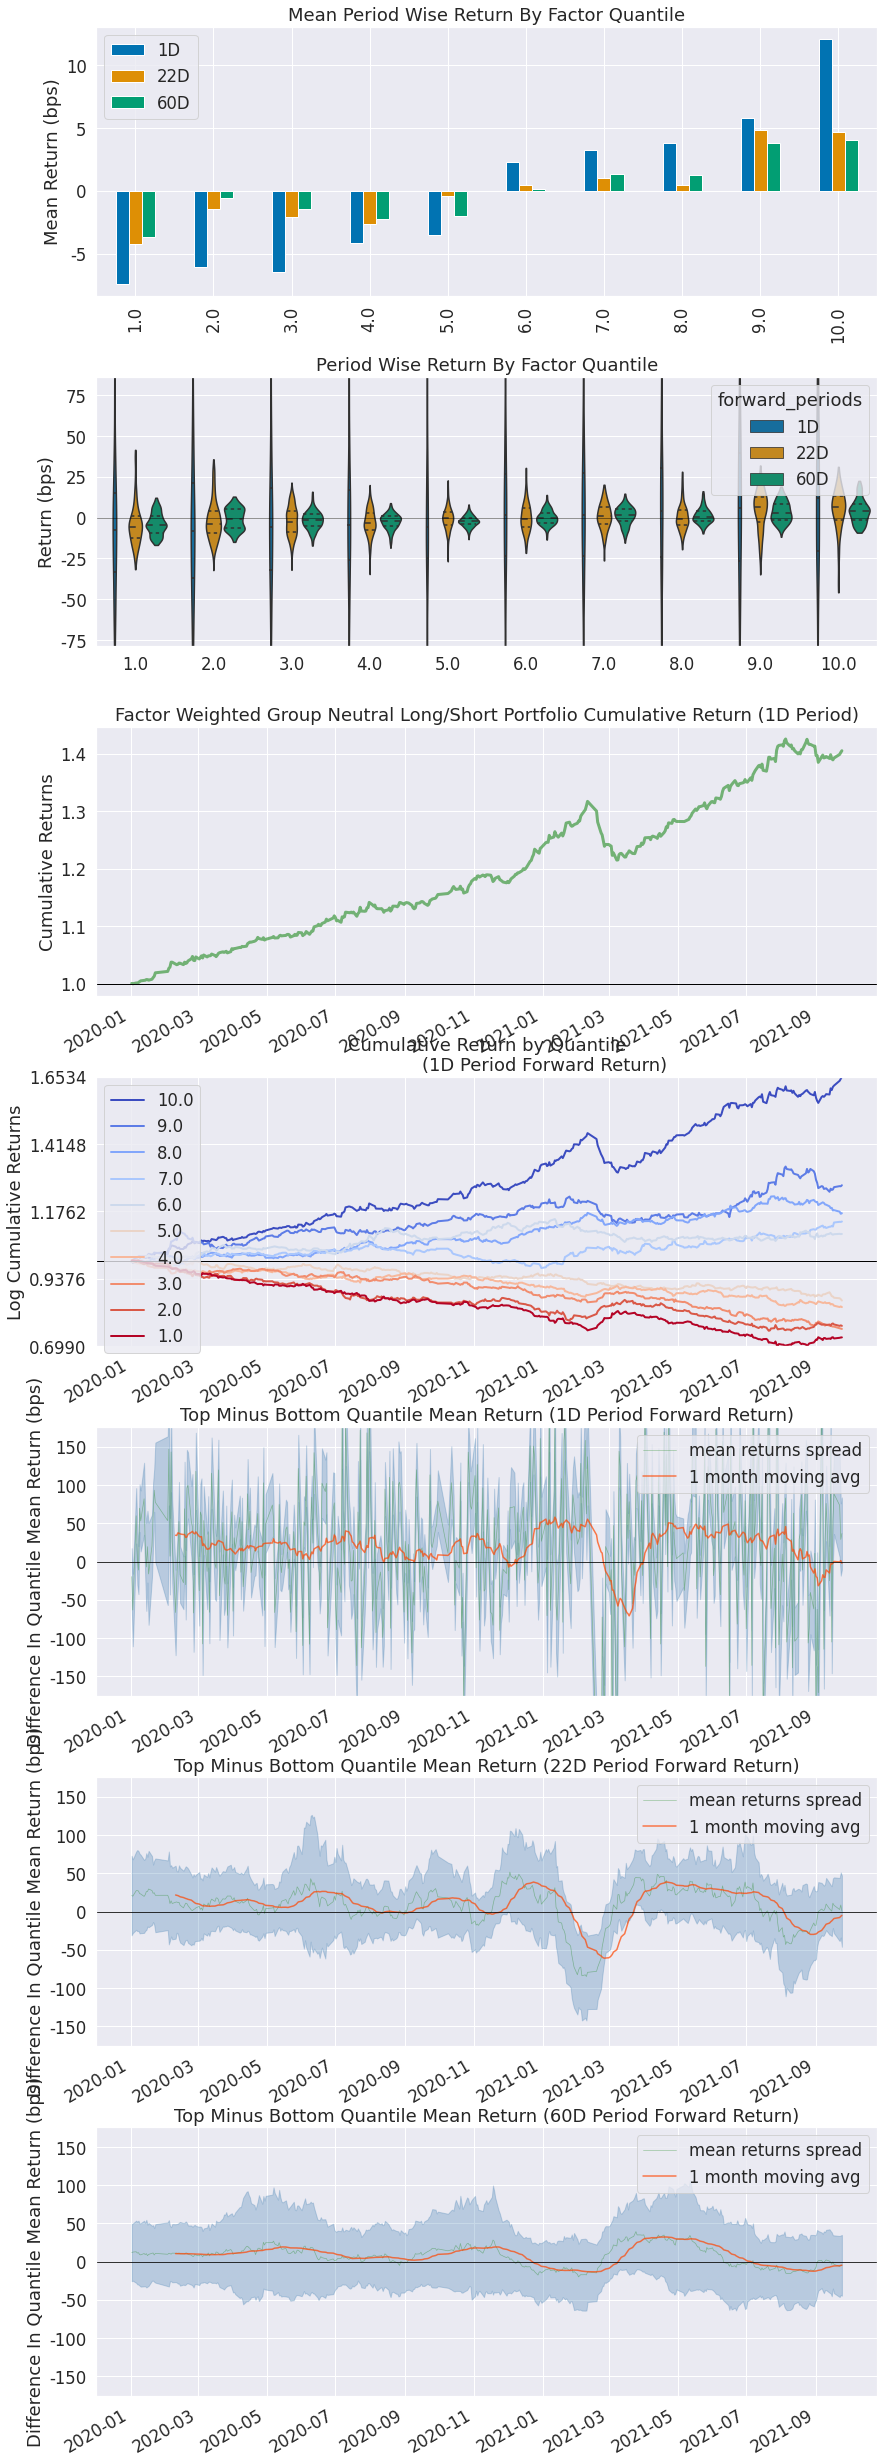

In [11]:
tears.create_returns_tear_sheet(factor_data,
                                long_short=True,  # 是否计算多空组合的收益，如果 True，资产权重按平均值降低，使得分位数以 0 为轴，即超额收益，同时因为有做空机制，市场效应被中性化了，组合不再受市场的波动而影响。如果为 FALSE，则计算资产权重，将因子除以绝对值的和，实现为绝对收益，并且只显示多头的纯组合
                                group_neutral=True,  # 是否按照行业调整或者行业中性后的收益
                                by_group=False # 是否按照行业分组展示
                               )

## 7)因子IC分析

因子IC 部分包括了因子IC 表、因子IC 时间序列、因子IC 分布图和QQ 图、因子IC 热力图等结果。

表 1 为因子的 IC 描述性统计
- IC 代表了因子预测股票收益的能力，计算公式因子值和下期收益之间的斯皮尔曼相关秩，业务逻辑上是全部股票在调仓周期期初的排名和本调仓周期收益排名的线性相关度。
- IC Mean 均值是多个调仓周期 IC 的平均值。IC 越大，表明排名分越靠前的股票，未来收益排名也越靠前。IC的理论最大值为1，但对于多年的IC均值来说， >0.05时就可以认为因子是有效的阿尔法因子， >0.1时就可以认为因子是特别好的阿尔法因子。当 IC 均值接近0时，因子可被认为是无效因子。当IC均值< -0.05, 因子可以被认为是反向有效因子，只要将排名次序倒过来，因子就是正向的阿尔法因子。简而言之，IC 均值的绝对值越大，因子越有效。 
- IC Std 为 IC 的标准差，数字越小，IC 的值越集中，稳定性越好。
- Risk Adjusted IC 风险调整的 IC 即为 IR，是 IC 的均值与标准差的比值，也是超额收益的均值与超额收益的标准差比值。如果值高，证明线性预测能力更强。因为每个回测时段有多个调仓周期，即每个周期都会产生一个 IC，那么 IR 就是评价调仓周期的选股性能和选股能力的稳定性，最好可以 >0.5。
- 基于置信度的假设检验，这里给出了 IC 的 t 统计量，期望的 IC 是高均值低标准差，对应的 t 统计量应尽可能 >2，P 值尽可能小，最好 < 5%(0.05)
- Skew 偏度为分布的三阶矩，反映了信号的不对称程度，即尾巴的部分，如果为负则左偏，存在负厚尾，为正右偏。主要分析小概率收益的所在区域。
- Kurtosis 峰度为分布的四阶矩，反应了信号概率密度的陡峭程度，即尖的部分，峰度为3时分布为正态，>3 时峰比较尖，比正态更陡峭，<3 时更肥。所以，峰度高意味着方差增大是由低频度的大于或小于平均值的极端值引起的。主要分析小概率事件对整体的影响程度。

图 1 为 IC 收益率的时间序列，主要关注其波动性的聚集性和幅度

图 2-3 为直方图和 QQ 图
- 直方图是每日 IC 分布的合集，用于评估 IC 是否为正态。
- 如果满足正态分布，QQ 图上的点应该分布在 y=x 的直线上。如果存在较大的 IC 信号，那么分布将出现较大的尾巴，即极端的尖峰和右偏。所以希望合理的 QQ 图不应该正态分布，而应该是一个 S 形，更肥的尾部可以包含更多的信息增益，确保预测的能力是依靠稳定的尾部分布区间，还是部分极端值，这是对 IC 可靠性的分析验证。

图 4 为热力图，提供了不同时段的预测能力展示，更利于识别哪些时段 IC 的值更好，但更应该关注的突发情况，即快速出现信号失效的情况。

图 5 为按行业显示的 IC 值，这里显示为申万代码

Information Analysis


,1D,22D,60D
IC Mean,0.005,0.009,0.014
IC Std.,0.094,0.117,0.106
Risk-Adjusted IC,0.049,0.081,0.132
t-stat(IC),1.010,1.654,2.707
p-value(IC),0.313,0.099,0.007
IC Skew,-0.143,-1.423,-0.608
IC Kurtosis,-0.094,2.111,-0.654


<Figure size 432x288 with 0 Axes>

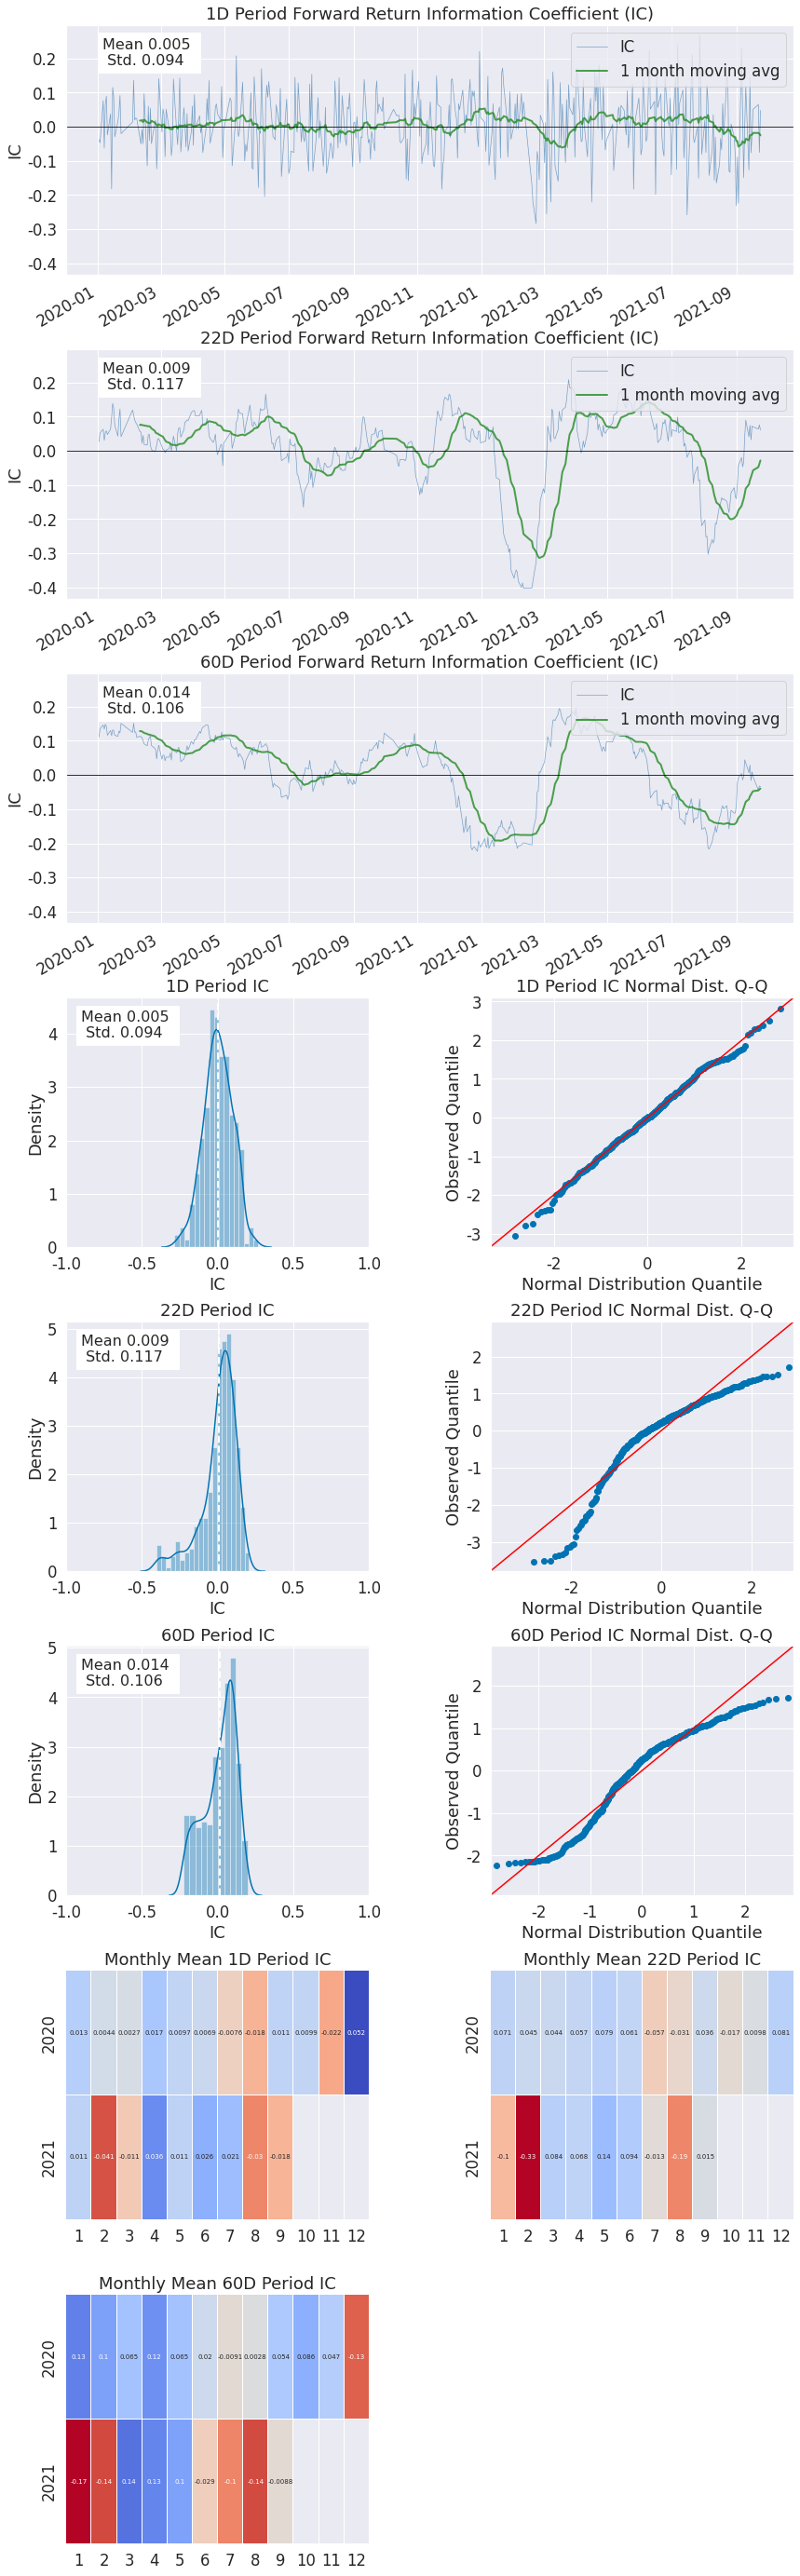

In [12]:
tears.create_information_tear_sheet(factor_data,
                                    group_neutral=True,  # 是否按照行业调整或者行业中性后的收益
                                    by_group=False # 是否按照行业分组展示
                                   )

## 8)因子换手分析

因子换手部分包括了因子分组平均换手率、因子换手率时间序列及因子排序自相关性等结果。这里的换手率指的是单边的成分股的调整个数占比。

表 1 为不同周期下的分组平均换手率统计结果

图 1-3 为 top 和 bottom 组的换手率对比

图 4-6 为不同周期下，因子当期因子排序与下期因子排序的相关性序列图。如果说图 1-3 只刻画了两端分组的换手率对比，那么图 4-6 刻画的是整个横截面的换手率，截面换手率越低，交易次数越少，因子的自相关性就越高，整体性价比也越高。如果自相关性一会高一会低，就会产生较高的换手率。

Turnover Analysis


,1D,22D,60D
Quantile 1.0 Mean Turnover,0.027,0.177,0.329
Quantile 2.0 Mean Turnover,0.075,0.392,0.602
Quantile 3.0 Mean Turnover,0.099,0.460,0.689
Quantile 4.0 Mean Turnover,0.106,0.480,0.690
Quantile 5.0 Mean Turnover,0.114,0.481,0.657
Quantile 6.0 Mean Turnover,0.142,0.525,0.708
Quantile 7.0 Mean Turnover,0.116,0.489,0.677
Quantile 8.0 Mean Turnover,0.082,0.408,0.621
Quantile 9.0 Mean Turnover,0.085,0.400,0.589
Quantile 10.0 Mean Turnover,0.031,0.188,0.347


,1D,22D,60D
Mean Factor Rank Autocorrelation,0.998,0.959,0.903


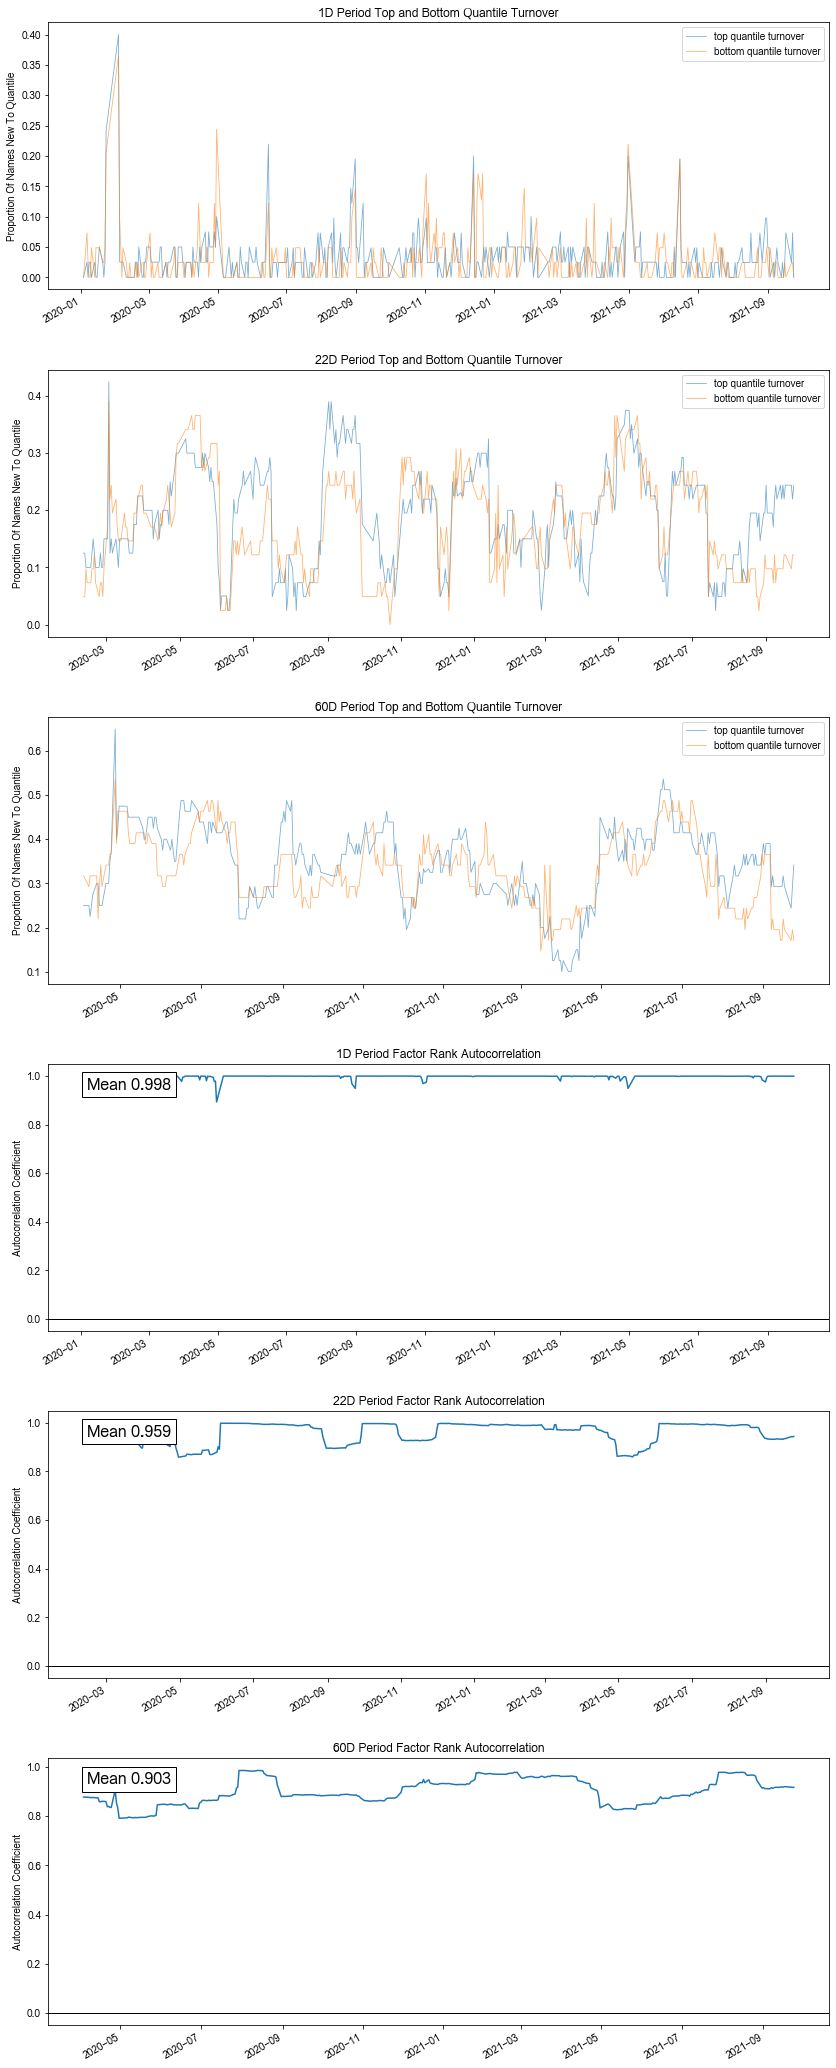

In [78]:
create_turnover_tear_sheet(factor_data)

## 9)事件研究

创建一个样例图表(tear sheet)来查看一个窗口内（事件按交易日前后）统计的因子平均累计收益率。

图 1 事件研究部分包括了因子分组平均超额收益随时间的关系

图 2 为每组超额收益随时间的分布特征

<Figure size 432x288 with 0 Axes>

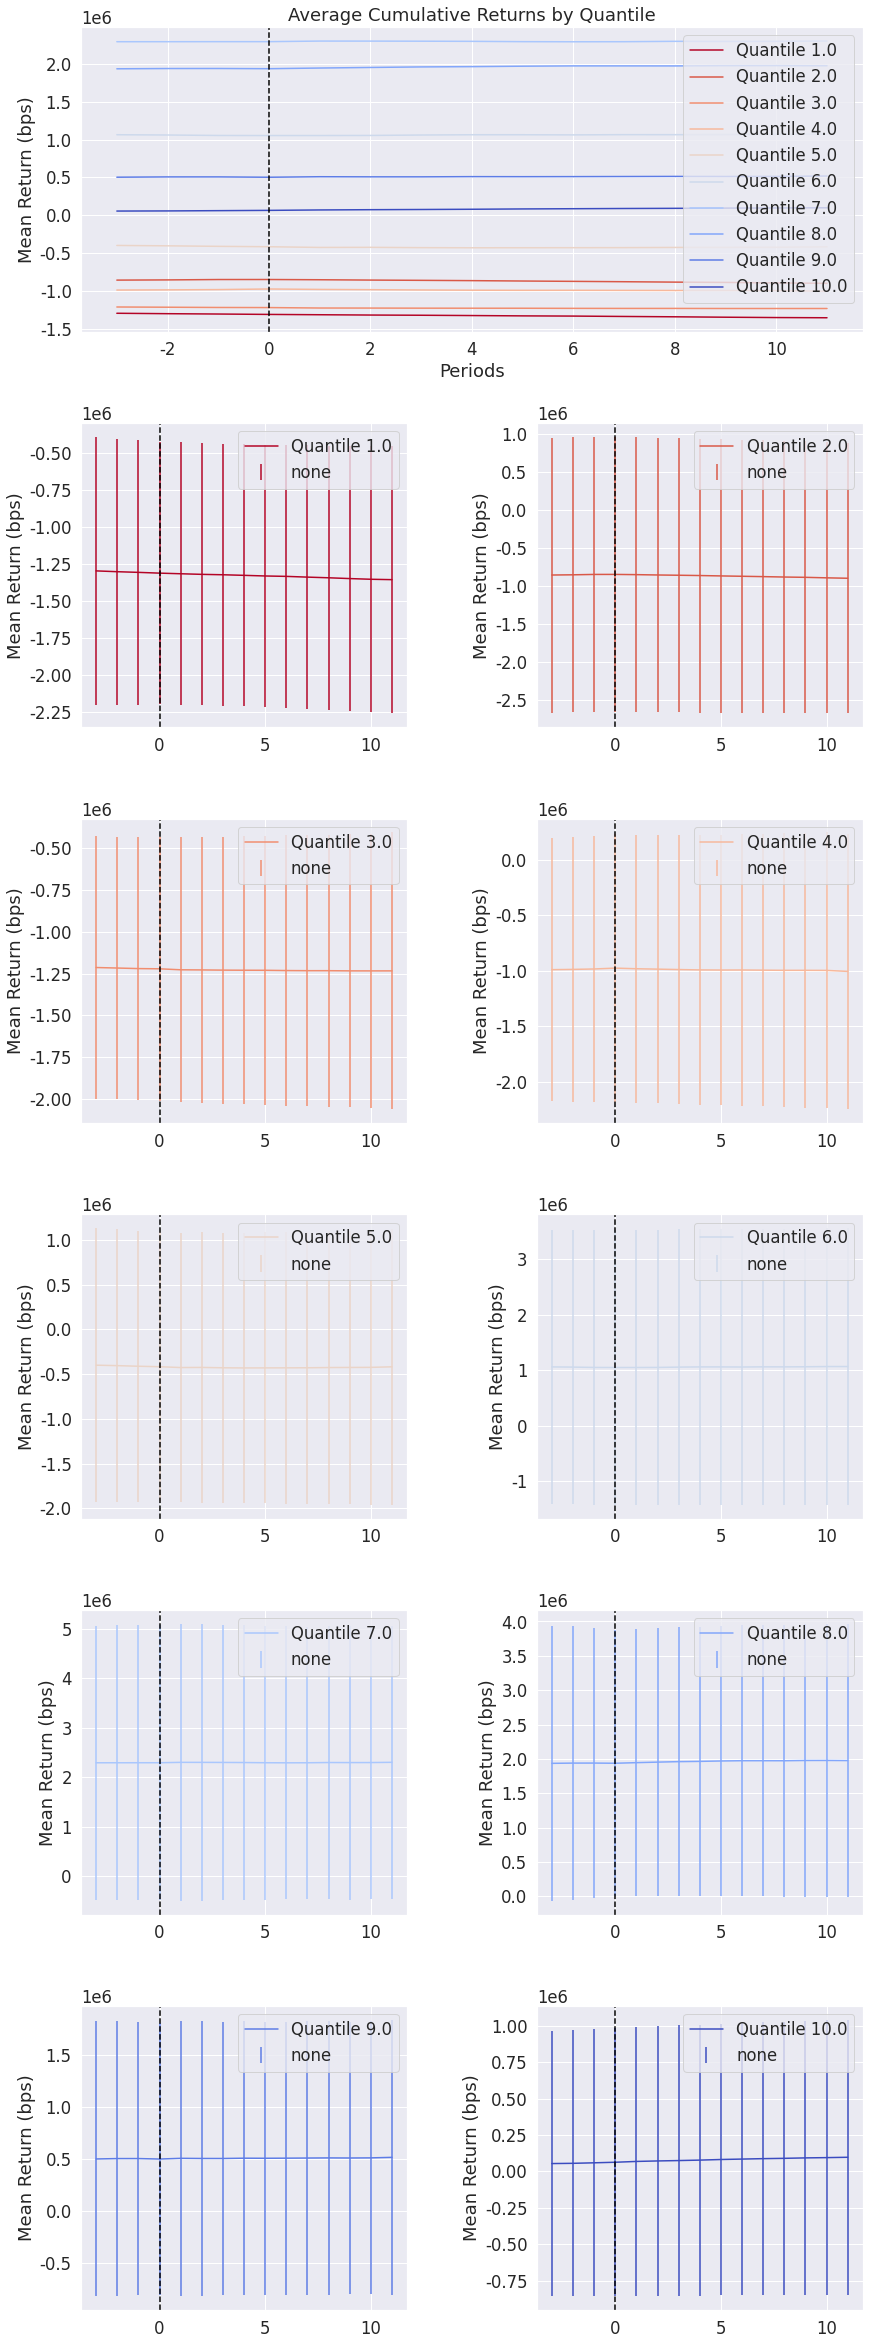

In [12]:
tears.create_event_returns_tear_sheet(factor_data, 
                                      prices, 
                                      avgretplot=(3, 11),  # (几天前, 几天后) 的收益分布，如果为 None，则绘制分组的平均累计收益
                                      long_short=True, 
                                      group_neutral=False,  # 为 True 时报错
#                                       std_bar=True, # 为每个分组图显示带标准差
                                      by_group=False
                                     )

## 10)分组查看

按行业来查看IC和收益数据

In [37]:
ic_by_sector = perf.mean_information_coefficient(factor_data, by_group=True)
ic_by_sector

,1D,22D,60D
group,,,
交通运输,0.004913,-0.060489,-0.118523
传媒,0.029969,0.032815,0.051883
公用事业,0.009897,0.042444,0.055535
农林牧渔,0.073750,0.234204,0.344656
医药生物,0.049526,0.079692,0.080737
商贸零售,0.057381,0.104828,0.099762
国防军工,-0.000492,-0.108366,-0.142084
基础化工,0.036474,-0.021711,-0.097885
家用电器,0.022237,0.059569,0.005650


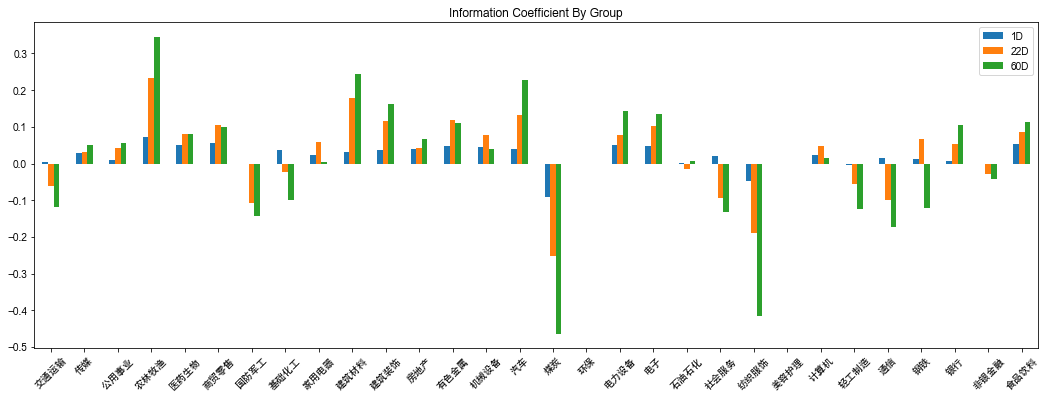

In [38]:
plotting.plot_ic_by_group(ic_by_sector);

In [39]:
mean_return_quantile_sector, mean_return_quantile_sector_err = perf.mean_return_by_quantile(factor_data, by_group=True)
mean_return_quantile_sector

1D       22D       60D
factor_quantile group                              
1.0             交通运输  -0.000614 -0.000691  0.000316
                传媒    -0.000402 -0.027377 -0.088372
                公用事业  -0.000124 -0.003783 -0.006922
                农林牧渔  -0.002253 -0.044511 -0.112254
                医药生物  -0.000267 -0.006693 -0.027359
...                         ...       ...       ...
10.0            通信    -0.000123 -0.021543 -0.070808
                钢铁     0.002184  0.031074  0.045474
                银行     0.000107 -0.004040 -0.006183
                非银金融   0.000203  0.001648 -0.007543
                食品饮料   0.002316  0.035532  0.112820

[300 rows x 3 columns]

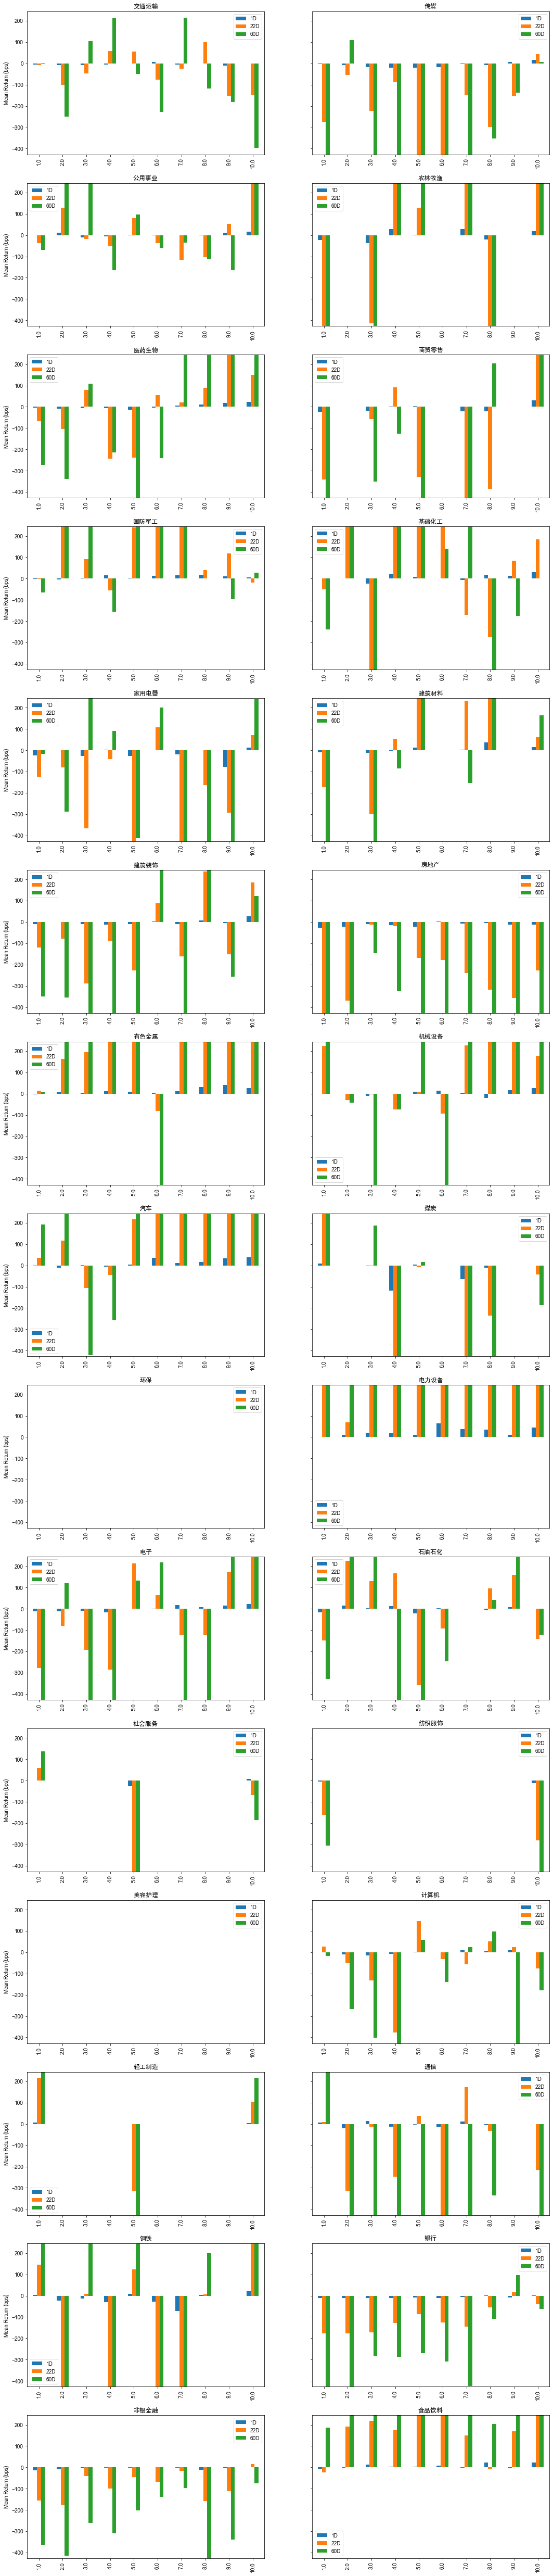

In [40]:
plotting.plot_quantile_returns_bar(mean_return_quantile_sector, by_group=True);

## 11)概要查看

简化版信息展示，比起后面的全景图会更精简

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,-2281.219971,53.610569,-25.231390,192.653665,17246,13.771790
2.0,-56.372276,58.324486,15.788362,11.565994,11775,9.402924
3.0,-12.363453,70.249580,19.325569,12.960380,10984,8.771271
4.0,-9.730210,95.261559,23.563747,15.388727,11991,9.575411
5.0,4.106172,213.323654,28.100536,19.985820,13541,10.813163
6.0,4.149823,144.733841,33.537216,22.971301,9262,7.396169
7.0,4.598577,158.507629,40.097584,27.570512,10645,8.500563
8.0,4.975533,168.663208,46.479122,32.562251,12330,9.846119
9.0,5.520285,273.756561,65.435280,48.345401,10429,8.328076


Returns Analysis


,1D,22D,60D
Ann. alpha,0.261,0.051,0.048
beta,0.164,0.188,0.170
Mean Period Wise Return Top Quantile (bps),12.472,5.096,4.206
Mean Period Wise Return Bottom Quantile (bps),-6.914,-3.755,-3.494
Mean Period Wise Spread (bps),19.386,8.889,7.749


Information Analysis


,1D,22D,60D
IC Mean,0.027,0.041,0.057
IC Std.,0.244,0.253,0.240
Risk-Adjusted IC,0.112,0.163,0.239
t-stat(IC),2.305,3.343,4.903
p-value(IC),0.022,0.001,0.000
IC Skew,-0.210,-0.798,-0.398
IC Kurtosis,-0.807,0.225,-0.882


Turnover Analysis


,1D,22D,60D
Quantile 1 Mean Turnover,0.027,0.177,0.329
Quantile 2 Mean Turnover,0.075,0.392,0.602
Quantile 3 Mean Turnover,0.099,0.460,0.689
Quantile 4 Mean Turnover,0.106,0.480,0.690
Quantile 5 Mean Turnover,0.114,0.481,0.657
Quantile 6 Mean Turnover,0.142,0.525,0.708
Quantile 7 Mean Turnover,0.116,0.489,0.677
Quantile 8 Mean Turnover,0.082,0.408,0.621
Quantile 9 Mean Turnover,0.085,0.400,0.589
Quantile 10 Mean Turnover,0.031,0.188,0.347


,1D,22D,60D
Mean Factor Rank Autocorrelation,0.998,0.959,0.903


<Figure size 432x288 with 0 Axes>

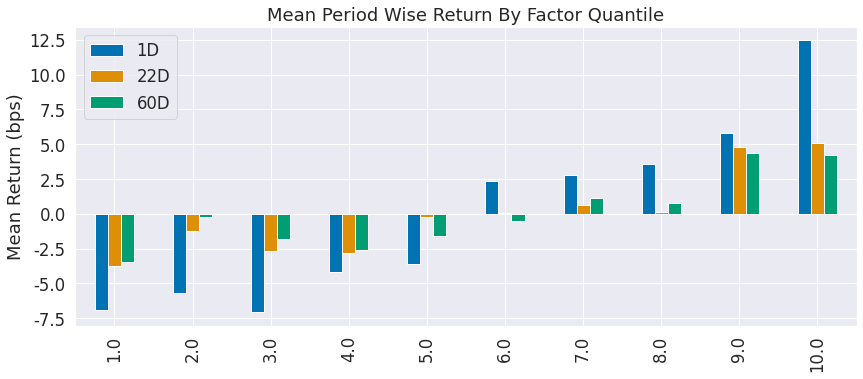

In [41]:
tears.create_summary_tear_sheet(factor_data)

## 11)全景图

生成完整的表图, 因为bug，所以还是分开算的好

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,-2281.219971,53.610569,-25.231390,192.653665,17246,13.771790
2.0,-56.372276,58.324486,15.788362,11.565994,11775,9.402924
3.0,-12.363453,70.249580,19.325569,12.960380,10984,8.771271
4.0,-9.730210,95.261559,23.563747,15.388727,11991,9.575411
5.0,4.106172,213.323654,28.100536,19.985820,13541,10.813163
6.0,4.149823,144.733841,33.537216,22.971301,9262,7.396169
7.0,4.598577,158.507629,40.097584,27.570512,10645,8.500563
8.0,4.975533,168.663208,46.479122,32.562251,12330,9.846119
9.0,5.520285,273.756561,65.435280,48.345401,10429,8.328076


Returns Analysis


,1D,22D,60D
Ann. alpha,0.261,0.051,0.048
beta,0.164,0.188,0.170
Mean Period Wise Return Top Quantile (bps),12.472,5.096,4.206
Mean Period Wise Return Bottom Quantile (bps),-6.914,-3.755,-3.494
Mean Period Wise Spread (bps),19.386,8.889,7.749


<Figure size 432x288 with 0 Axes>

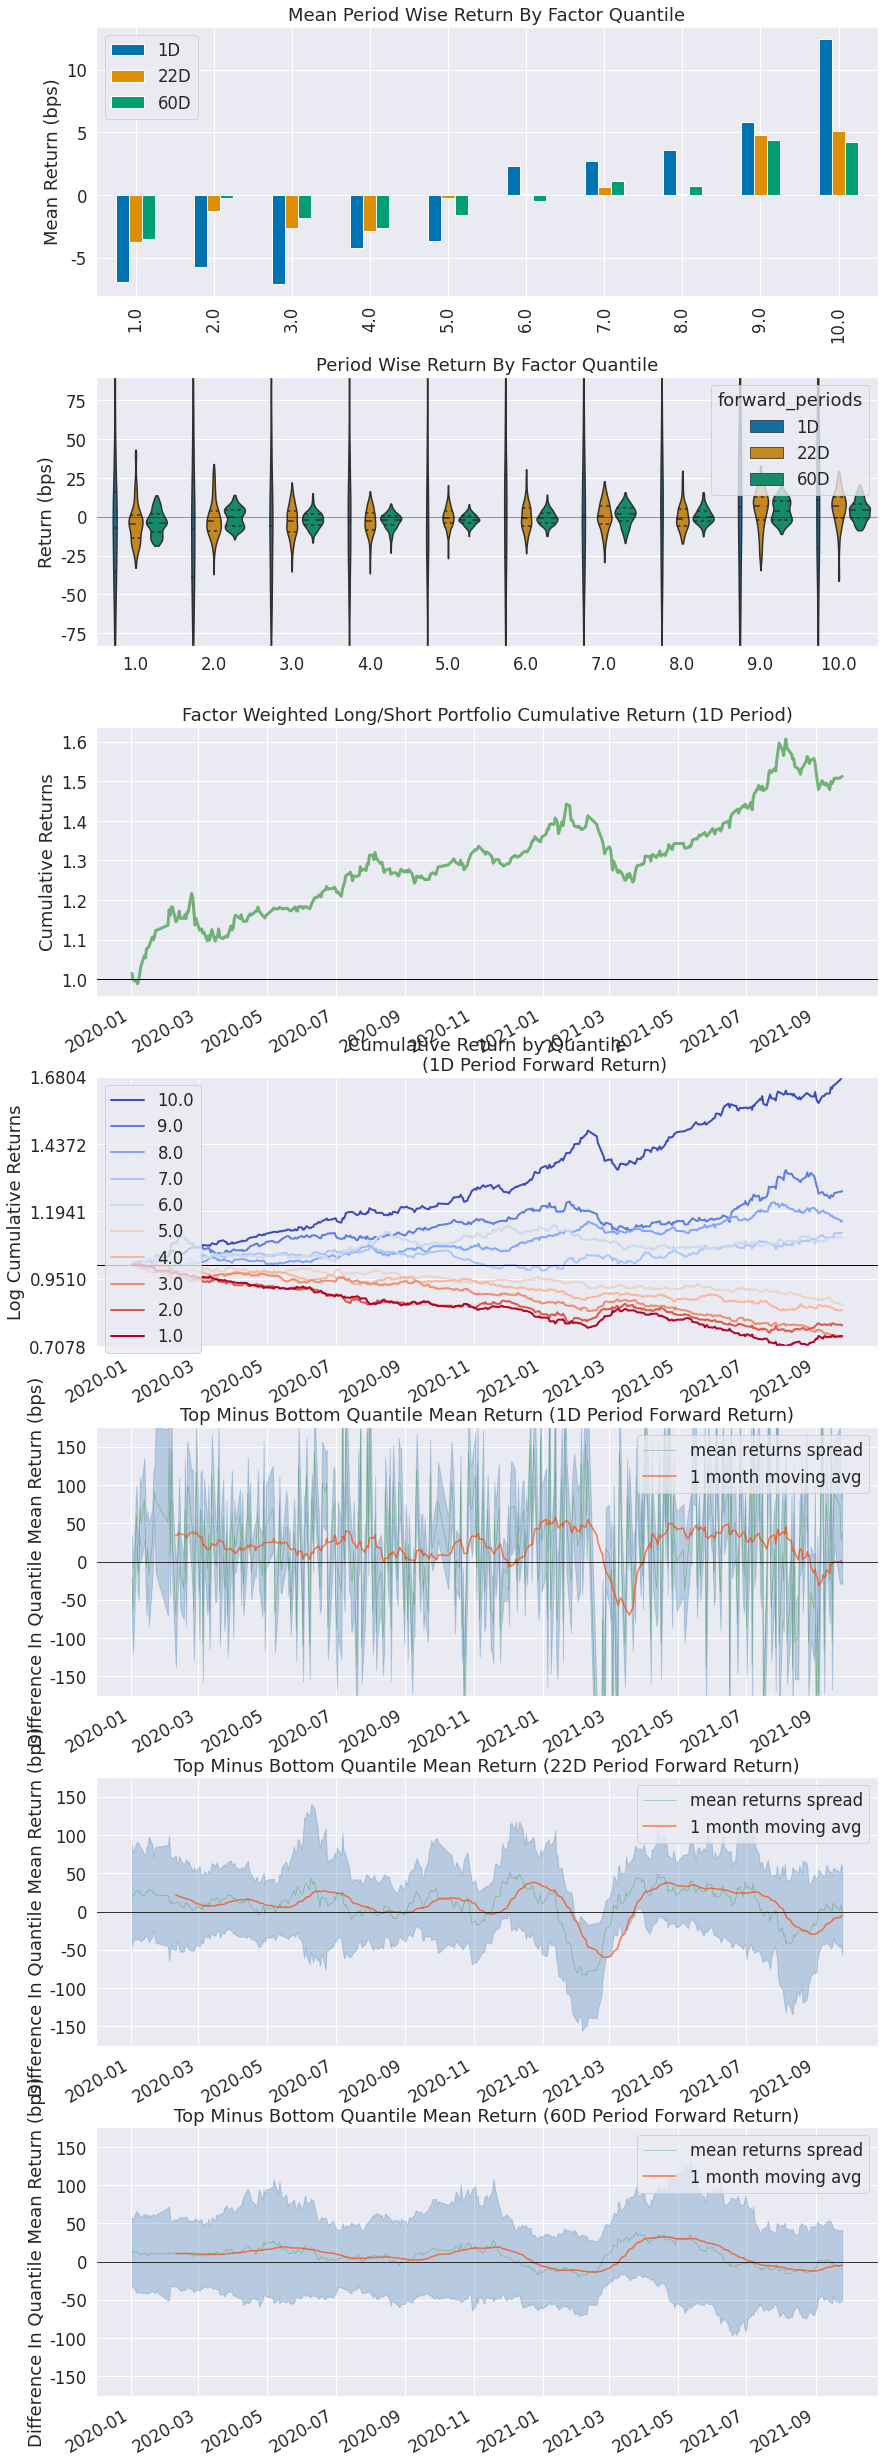

Information Analysis


,1D,22D,60D
IC Mean,0.027,0.041,0.057
IC Std.,0.244,0.253,0.240
Risk-Adjusted IC,0.112,0.163,0.239
t-stat(IC),2.305,3.343,4.903
p-value(IC),0.022,0.001,0.000
IC Skew,-0.210,-0.798,-0.398
IC Kurtosis,-0.807,0.225,-0.882


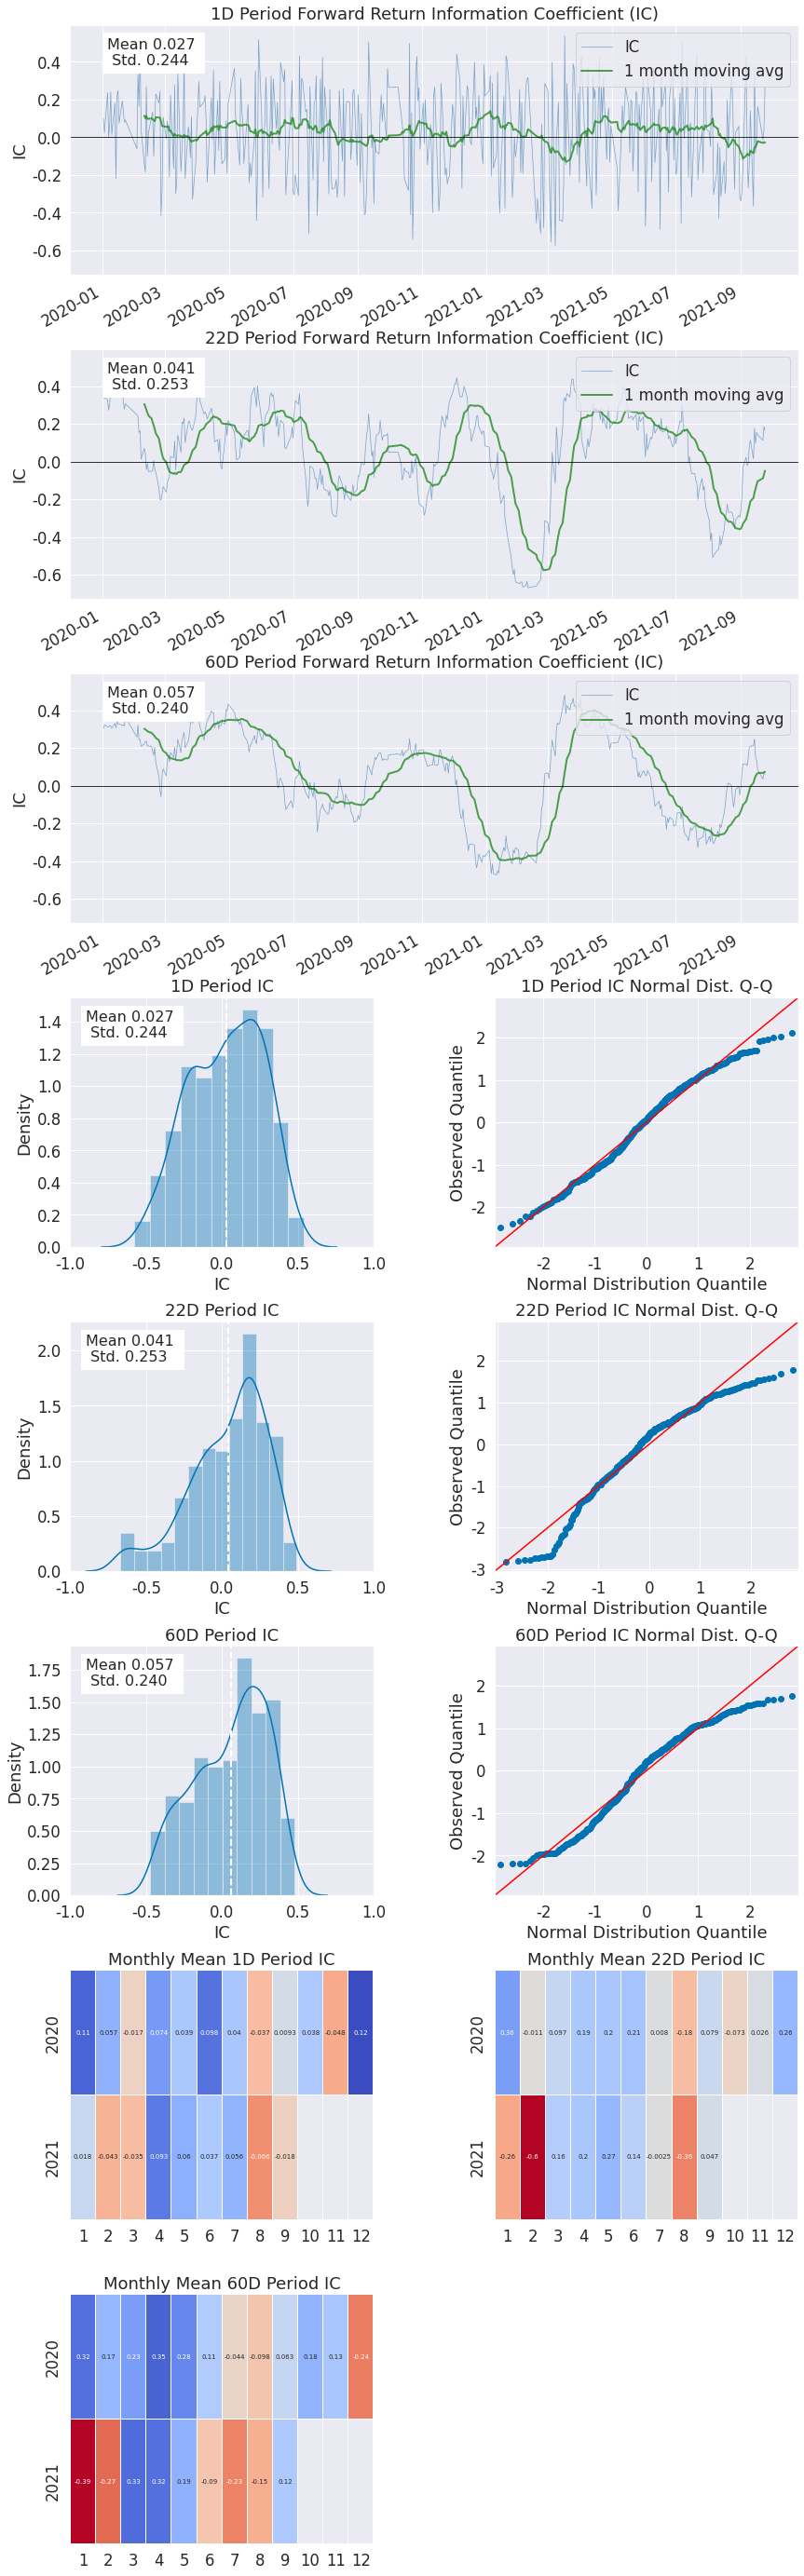

AttributeError: 'Index' object has no attribute 'get_values'

In [9]:
# 第一个是绘制因子分组统计结果的表格
# 第二部分是绘制因子分析的“撕页”
# 第三部分是绘制因子 IC 分析的“撕页”
# 最后部分是绘制因子换手率的“撕页”
tears.create_full_tear_sheet(factor_data,
                       long_short=True,  # 是否计算多空组合的收益
                       group_neutral=False,  # 是否按照行业调整或者行业中性后的收益
                       by_group=False  # 数含义与前面相同，即是否按照行业分组展示
                      )

## 12)投资组合分析

后续无法分析，平台不支持导入 pyfolio 库

In [10]:
pf_returns, pf_positions, pf_benchmark = perf.create_pyfolio_input(factor_data,
                                                                   period='1D',  # 需要存在于原始数据中的周期
                                                                   capital=1000000,  # 组合的初始资金
                                                                   long_short=True,
                                                                   group_neutral=True,
                                                                   equal_weight=True,  # 如果为 False，将按因子的权重进行加权
                                                                   quantiles=None,  # 选择分组如[1, 10]，默认选择全部
                                                                   groups=None,
                                                                   benchmark_period='1D'
                                                                   )

TypeError: cumulative_returns() takes 1 positional argument but 2 were given

In [ ]:
pf.tears.create_full_tear_sheet(pf_returns,
                                positions=pf_positions,
                                #benchmark_rets=pf_benchmark, # optional, default to SPY
                                hide_positions=True)

## 13)风险暴露

通过风险模型来分析因子暴露

In [ ]:
from quantopian.research.experimental import get_factor_loadings, get_factor_returns
asset_list = factor_data.index.levels[1].unique()
start_date = factor_data.index.levels[0].min()
end_date   = factor_data.index.levels[0].max()

factor_loadings = get_factor_loadings(asset_list, start_date, end_date)
factor_returns = get_factor_returns(start_date, end_date)
Pyfolio expects factor_loadings to have specific index names

factor_loadings.index.names = ['dt', 'ticker']
pf.tears.create_perf_attrib_tear_sheet(pf_returns,
                                       positions=pf_positions,
                                       factor_returns=factor_returns,
                                       factor_loadings=factor_loadings,      
                                       pos_in_dollars=True)